In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df=pd.read_csv('gender_submission.csv')
y_test=df['Survived']
print(df.head())
print(test_df.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [155]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [156]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [159]:
y_train=train_df['Survived']
X_train=train_df

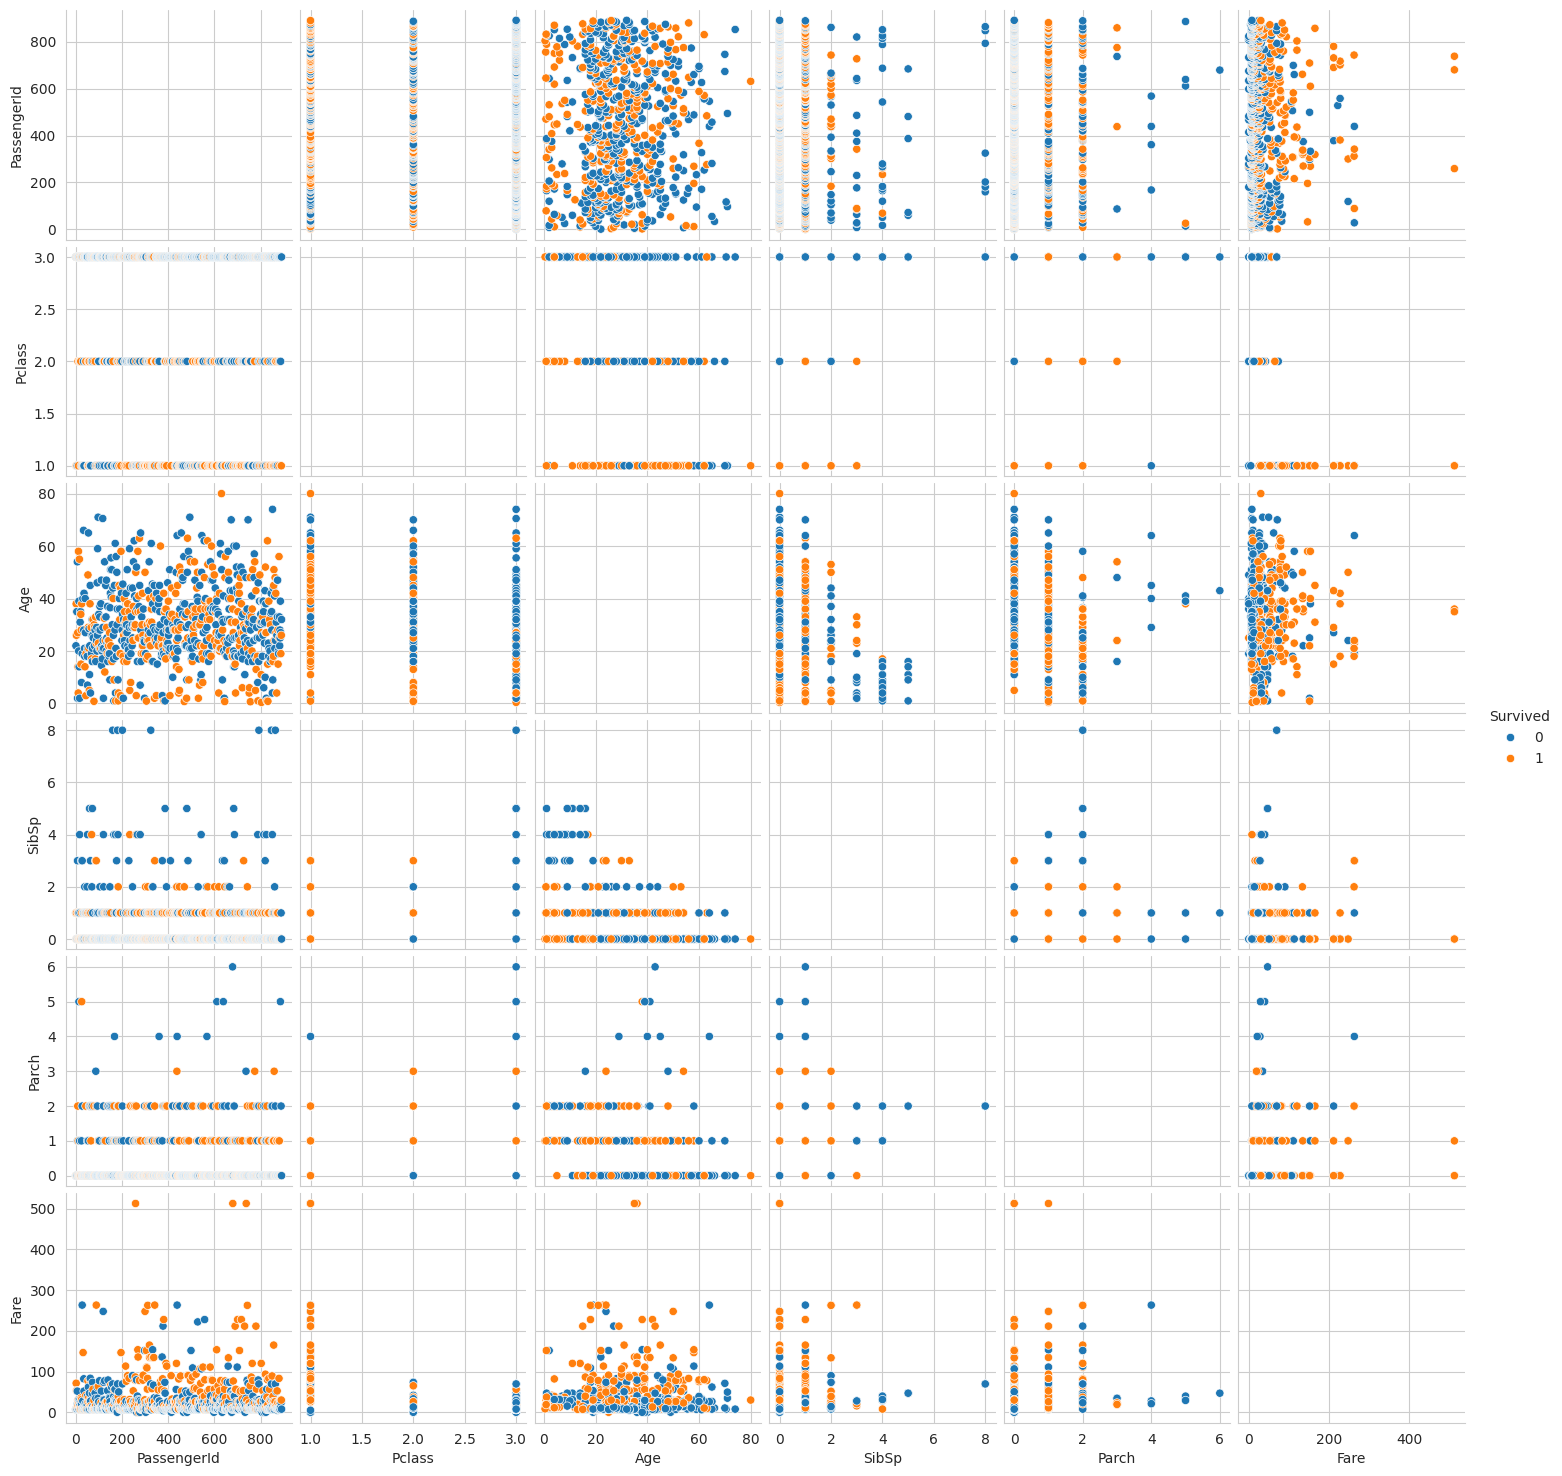

In [160]:
#pairplot
sns.set_style('whitegrid')
sns.pairplot(X_train,diag_kind='pie',hue='Survived')

Text(0.5, 1.0, 'Survived')

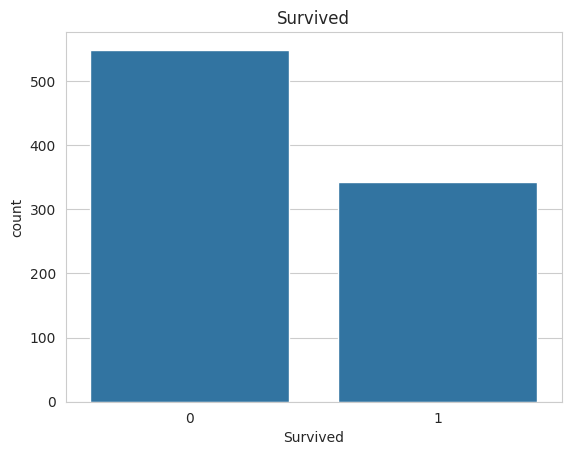

In [161]:
#Exploratory Data Analysis
sns.countplot(x='Survived',data=X_train)
plt.title('Survived')

Text(0.5, 1.0, 'Survived')

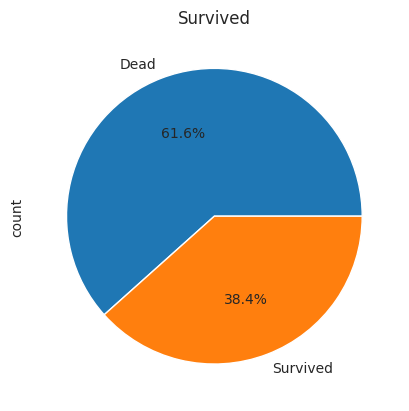

In [162]:
#Pie Plot
X_train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',labels=['Dead','Survived'])
plt.title('Survived')
#0=dead
#1=Survived

<Axes: xlabel='Pclass', ylabel='count'>

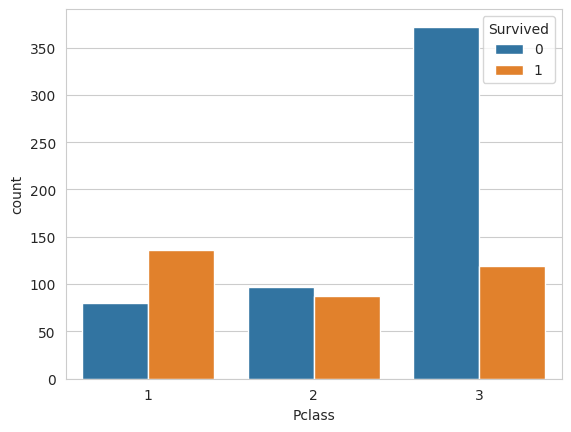

In [163]:
#Class vs Survival
sns.countplot(x='Pclass',data=X_train,hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

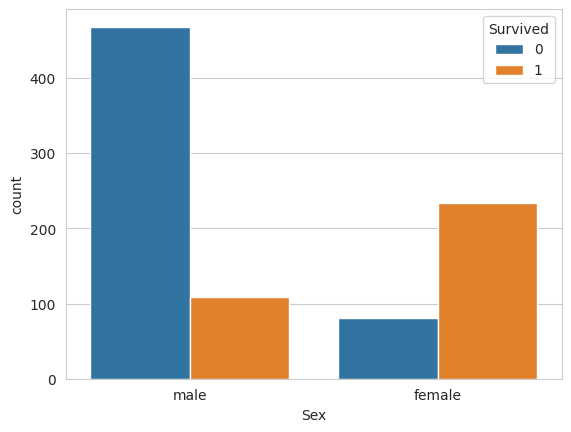

In [164]:
#Sex vs Survival
sns.countplot(x='Sex',data=X_train,hue='Survived')

<Axes: xlabel='Age_group', ylabel='count'>

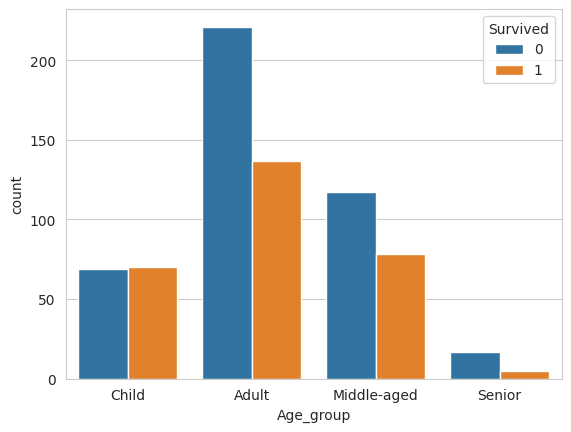

In [165]:
#Discretized Age vs Survival
X_train['Age_group']=pd.cut(X_train['Age'],bins=[0,18,35,60,80],labels=['Child','Adult','Middle-aged','Senior'],right=True)
test_df['Age_group']=pd.cut(test_df['Age'],bins=[0,18,35,60,80],labels=['Child','Adult','Middle-aged','Senior'],right=True)
sns.countplot(x='Age_group',data=X_train,hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

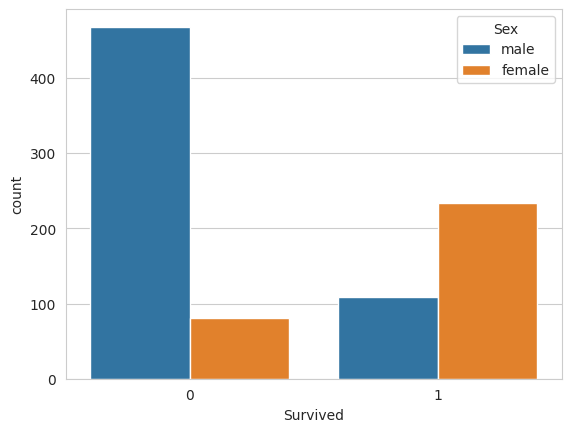

In [166]:
#age_group vs class vs sex vs survival
sns.countplot(x='Survived',data=X_train,hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

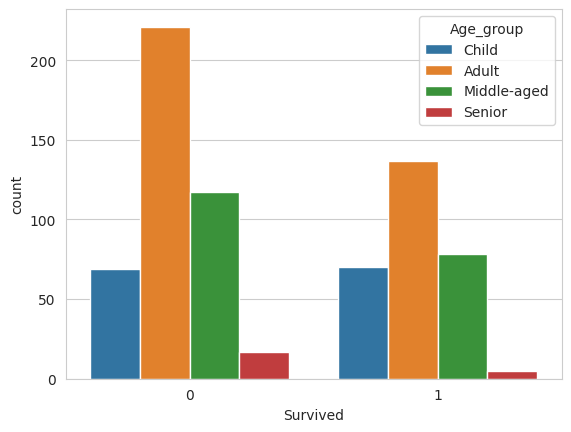

In [167]:
sns.countplot(x='Survived',data=X_train,hue='Age_group')

In [168]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [169]:
print(X_train.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked    Age_group  
0      0         A/5 21171   7.2500   NaN        S        Adult  
1      0          PC 17599  71.2833   C85        C  Middle-aged  
2      0  STON/O2. 3101282   7.9250   NaN        S        Adult  
3      0            113803  53.1000  C123        S      

In [170]:
#Extracting Cabin designations and imputing values
X_train['Cabin']=X_train['Cabin'].str[0]
X_train['Cabin'].fillna('X',inplace=True)
test_df['Cabin']=test_df['Cabin'].str[0]
test_df['Cabin'].fillna('X',inplace=True)

<ipython-input-170-e56e2e493785>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['Cabin'].fillna('X',inplace=True)
<ipython-input-170-e56e2e493785>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [171]:
#Dropping Ticket column
X_train.drop(['Ticket'],axis=1,inplace=True)
test_df.drop(['Ticket'],axis=1,inplace=True)

In [172]:
#FIXING age columns
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
X_train['Age']=imputer.fit_transform(X_train[['Age']])

In [173]:
test_df['Age']=imputer.fit_transform(test_df[['Age']])

In [174]:
#Filling in missing Embarked features
imputer_mode=SimpleImputer(strategy='most_frequent')
X_train['Embarked']=imputer_mode.fit_transform(X_train[['Embarked']]).ravel()
X_train['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [175]:
X_train['Embarked']=imputer_mode.fit_transform(X_train[['Embarked']]).ravel()
X_train['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [176]:
#Fare imputing
test_df['Fare']=imputer.fit_transform(test_df[['Fare']])

In [177]:
X_train['Cabin'].isna().sum()

0

In [178]:
print(X_train.head())
print(test_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked    Age_group  
0      0   7.2500     X        S        Adult  
1      0  71.2833     C        C  Middle-aged  
2      0   7.9250     X        S        Adult  
3      0  53.1000     C        S        Adult  
4      0   8.0500     X        S        Adult  
   PassengerId  Pclass          

In [179]:
#Feature Engineering
X_train['FamilySize']=X_train['SibSp']+X_train['Parch']+1
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']+1

In [180]:
X_train1=X_train.copy()
test_df1=test_df.copy()

In [181]:
X_train1.drop((['Name','PassengerId']),axis=1,inplace=True)
test_df1.drop(['Name','PassengerId'],axis=1,inplace=True)

In [182]:
print(X_train1.head())
print(test_df1.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  \
0         0       3    male  22.0      1      0   7.2500     X        S   
1         1       1  female  38.0      1      0  71.2833     C        C   
2         1       3  female  26.0      0      0   7.9250     X        S   
3         1       1  female  35.0      1      0  53.1000     C        S   
4         0       3    male  35.0      0      0   8.0500     X        S   

     Age_group  FamilySize  
0        Adult           2  
1  Middle-aged           2  
2        Adult           1  
3        Adult           2  
4        Adult           1  
   Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked    Age_group  \
0       3    male  34.5      0      0   7.8292     X        Q        Adult   
1       3  female  47.0      1      0   7.0000     X        S  Middle-aged   
2       2    male  62.0      0      0   9.6875     X        Q       Senior   
3       3    male  27.0      0      0   8.6625     X        S  

In [183]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [184]:
X_train1['Sex']=le.fit_transform(X_train1['Sex'])
X_train1['Embarked']=le.fit_transform(X_train1['Embarked'])
X_train1['Cabin']=le.fit_transform(X_train1['Cabin'])
test_df1['Sex']=le.fit_transform(test_df1['Sex'])
test_df1['Embarked']=le.fit_transform(test_df1['Embarked'])
test_df1['Cabin']=le.fit_transform(test_df1['Cabin'])
print(X_train1.head())
print(test_df1.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked  \
0         0       3    1  22.0      1      0   7.2500      8         2   
1         1       1    0  38.0      1      0  71.2833      2         0   
2         1       3    0  26.0      0      0   7.9250      8         2   
3         1       1    0  35.0      1      0  53.1000      2         2   
4         0       3    1  35.0      0      0   8.0500      8         2   

     Age_group  FamilySize  
0        Adult           2  
1  Middle-aged           2  
2        Adult           1  
3        Adult           2  
4        Adult           1  
   Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked    Age_group  \
0       3    1  34.5      0      0   7.8292      7         1        Adult   
1       3    0  47.0      1      0   7.0000      7         2  Middle-aged   
2       2    1  62.0      0      0   9.6875      7         1       Senior   
3       3    1  27.0      0      0   8.6625      7         2        Adult

In [185]:
X_train1['Cabin'].value_counts()

,count
Cabin,
8,687
2,59
1,47
3,33
4,32
0,15
5,13
6,4
7,1


In [186]:
X_train['Cabin'].value_counts()

,count
Cabin,
X,687
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1


In [187]:
X_train1['Age_group']=le.fit_transform(X_train1['Age_group'])

<Axes: >

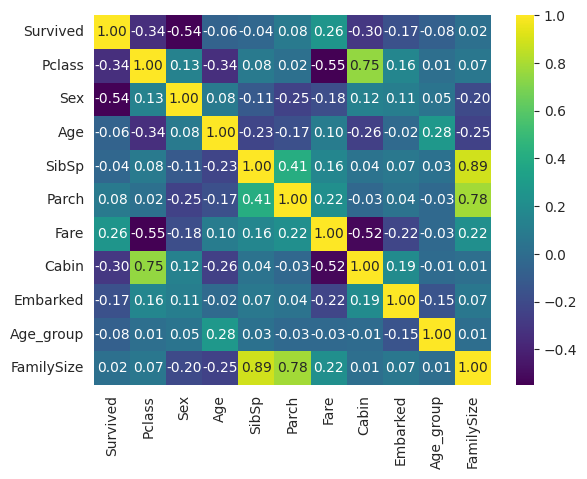

In [188]:
sns.heatmap(X_train1.corr(),cmap='viridis',annot=True,fmt='.2f')

In [189]:
X_train.drop(['PassengerId','Name','Survived','Age_group'],axis=1,inplace=True)

In [190]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,3,male,22.0,1,0,7.2500,X,S,2
1,1,female,38.0,1,0,71.2833,C,C,2
2,3,female,26.0,0,0,7.9250,X,S,1
3,1,female,35.0,1,0,53.1000,C,S,2
4,3,male,35.0,0,0,8.0500,X,S,1


In [273]:
from sklearn.pipeline import Pipeline,make_pipeline,FeatureUnion
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [274]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize
0,3,male,22.0,1,0,7.2500,X,S,2
1,1,female,38.0,1,0,71.2833,C,C,2
2,3,female,26.0,0,0,7.9250,X,S,1
3,1,female,35.0,1,0,53.1000,C,S,2
4,3,male,35.0,0,0,8.0500,X,S,1


In [275]:
numeric_features=['Age','Fare','FamilySize','SibSp','Parch']
categorical_features=['Pclass','Sex','Embarked','Cabin']

In [280]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [281]:
preprocessing_unit= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [282]:
pipeline = Pipeline(steps=[
    ('preprocessing_unit', preprocessing_unit),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [283]:
param_grid = {
    'classifier__n_estimators': [10,50, 100, 200],
    'classifier__max_depth': [None,5, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'classifier__max_depth': 10, 'classifier__n_estimators': 200}
Best cross-validation accuracy: 0.8226853304877283


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       266
           1       0.81      0.75      0.78       152

    accuracy                           0.84       418
   macro avg       0.84      0.82      0.83       418
weighted avg       0.84      0.84      0.84       418

0.8444976076555024


<Axes: >

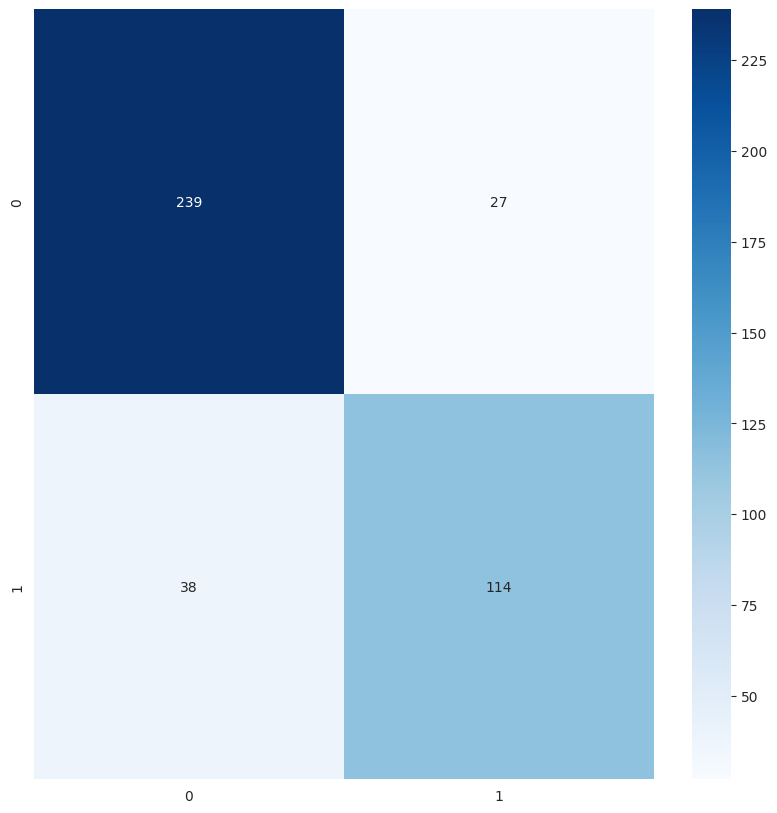

In [244]:
#test model
y_pred = grid_search.predict(test_df)
#evaluate
class_report=classification_report(y_test,y_pred)
print(class_report)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
#classification matrix plot
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')


In [245]:
#XGBoost
model2=Pipeline(steps=[
    ('preprocessing_unit',preprocessing_unit),
    ('classifier',XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42))
])


In [249]:
from sklearn.model_selection import cross_val_score

In [250]:
cross_val_scores = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:36:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:36:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:36:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:36:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:36:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Cross-validation accuracy: 0.82 ± 0.03


In [263]:
# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [30, 40, 50,80, 100, 150,180, 200],
    'classifier__learning_rate': [0.01,0.05,0.08, 0.1,0.12,0.13,0.14,0.15,0.2],
    'classifier__max_depth': [3,4,5,6,7]
}

# Set up GridSearchCV with the pipeline
grid_search2 = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search2.fit(X_train, y_train)

# Output best parameters and accuracy
print("Best parameters found:", grid_search2.best_params_)
print(f"Best cross-validation accuracy: {grid_search2.best_score_:.2f}")

# Evaluate the best estimator on the test set
best_model = grid_search2.best_estimator_
test_accuracy = best_model.score(test_df, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.2f}")

Best parameters found: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 30}
Best cross-validation accuracy: 0.85
Test set accuracy with best parameters: 0.88


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [260]:
#Print best parameters
print(grid_search2.best_params_)

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 4, 'classifier__n_estimators': 150}


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       266
           1       0.85      0.80      0.82       152

    accuracy                           0.88       418
   macro avg       0.87      0.86      0.86       418
weighted avg       0.87      0.88      0.87       418



<Axes: >

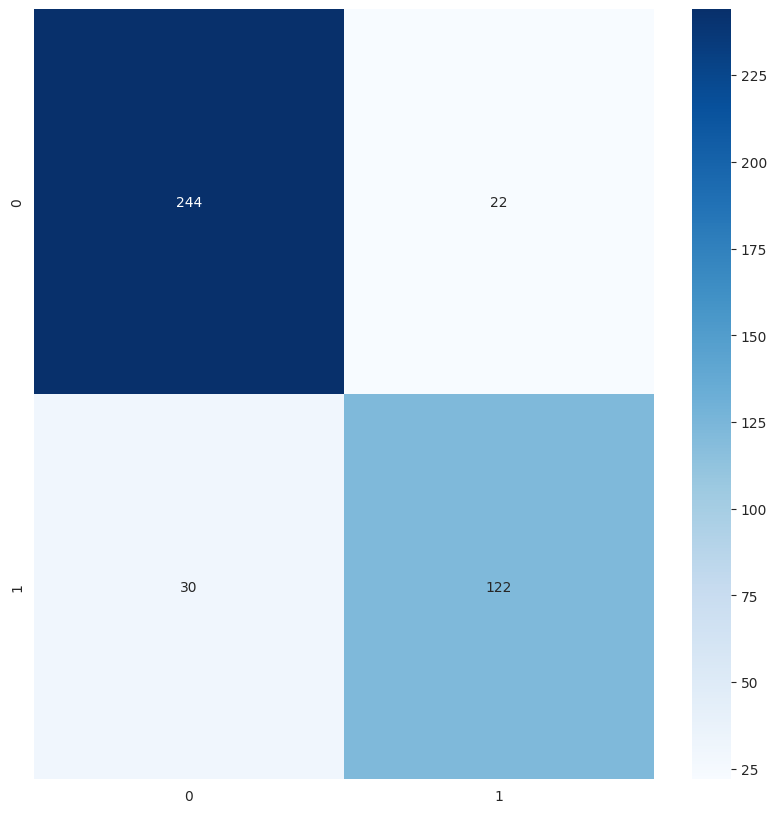

In [259]:
#report
print(classification_report(y_test,best_model.predict(test_df)))
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,best_model.predict(test_df)),annot=True,fmt='d',cmap='Blues')

In [284]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

In [308]:
pipeline3 = Pipeline(steps=[
    ('preprocessing_unit', preprocessing_unit),
    ('classifiermlp', MLPClassifier(max_iter=200,random_state=42))
])

In [310]:
param_grid = {
    'classifiermlp__hidden_layer_sizes': [(50,10), (10,10,10), (100, 50)],
    'classifiermlp__activation': ['relu', 'tanh'],
    'classifiermlp__solver': ['adam', 'sgd'],
    'classifiermlp__alpha': [0.0001, 0.001, 0.01],
    'classifiermlp__learning_rate': ['constant', 'adaptive']
}
# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

Best parameters found: {'classifiermlp__activation': 'tanh', 'classifiermlp__alpha': 0.0001, 'classifiermlp__hidden_layer_sizes': (50, 10), 'classifiermlp__learning_rate': 'constant', 'classifiermlp__solver': 'adam'}
Best cross-validation accuracy: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [311]:
pipeline3.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessing_unit',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'FamilySize',
                                                   'SibSp', 'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'Cabin'])])),
                ('classifiermlp', MLPClassifier(random_state=42))])

In [312]:
confusion_matrix(y_test,pipeline3.predict(test_df))

array([[238,  28],
       [ 33, 119]])

In [313]:
cl_report=classification_report(y_test,pipeline3.predict(test_df))
print(cl_report)
accuracy=accuracy_score(y_test,pipeline3.predict(test_df))
print(accuracy)


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       266
           1       0.81      0.78      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418

0.854066985645933
